# Project Foundations for Data Science: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/MIT - Python/foodhub_order.csv')
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Check the shape of the dataset
df.shape

(1898, 9)

Observation - There are 1898 rows and 9 column in the dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observation - Given in the output above is the datatypes of all the columns.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# Checking for missing values in the data
df.isnull().values.any() #function to print the sum of null values for each column

False

Observations - There are no missing values in the dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Get the summary statistics of the numerical data
df.describe(include = "all") ##function to print the statitical summary of the data

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


Observation - Given in the above output is the summary statistics of the data.

> Indented block



### **Question 5:** How many orders are not rated?

In [ ]:
df['rating'].value_counts()#function to print count of each rating


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
Not_given = df[df['rating'] == 'Not given'] ## code to store count of not given rating in new variable Not_given
Not_given.shape[0]

736

Observation - there are 736 orders that are not given any rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

Observation - There are 1898 unique order id in the data set.

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()  ## code to find out number of unique Customer ID

1200

Observation  - There are 1200 unique customer id in the data set.

#### Restaurant name

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ##code to find out number of unique Restaurant Name

178

Observation - There are 178 Unique Restaurants in the data set.

#### Cuisine type

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique() ##code to find out  number of  unique cuisine type

14

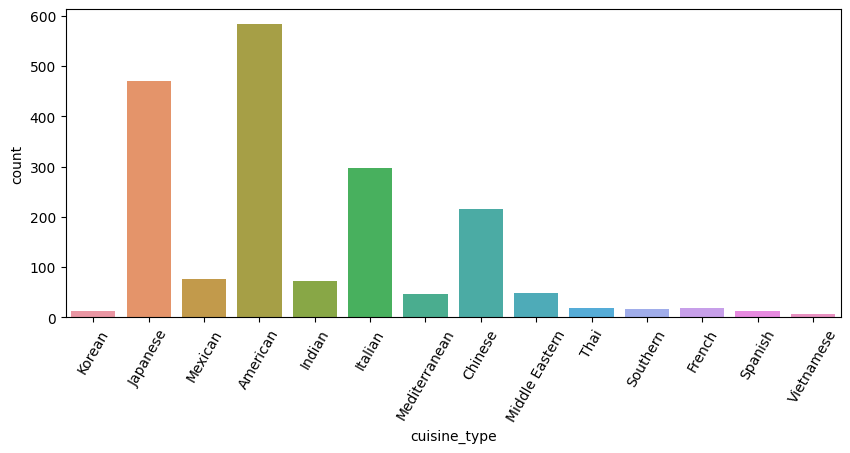

In [ ]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = 'cuisine_type') ## Code to create a countplot for cuisine type.
plt.xticks(rotation = 60)
plt.show()

Observation - There are 14vunique Cusines Available in the data type, from the Counplot we can infer that American cuisine is most demanded.

#### Cost of the order

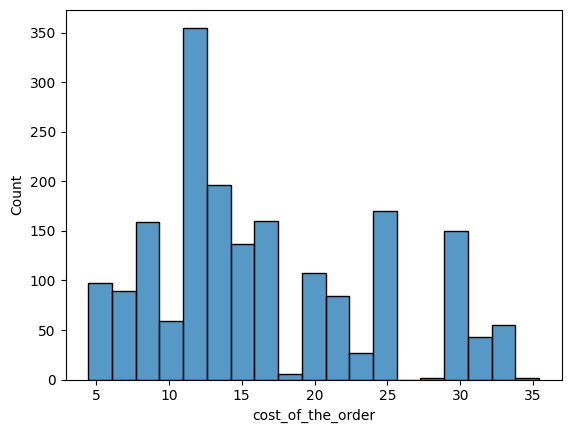

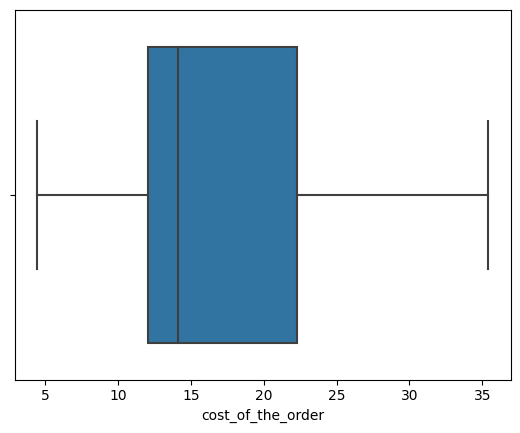

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

#### Day of the week

In [ ]:
# # Check the unique values
df['day_of_the_week'].nunique() ##code to check unique values for the 'day_of_the_week' column

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

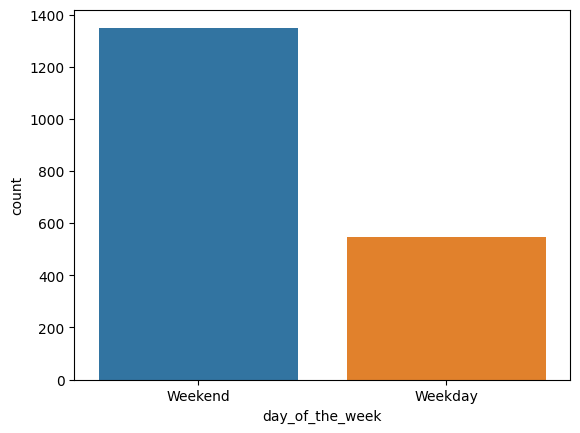

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week') ##code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [ ]:
# Check the unique values
df['rating'].nunique() ## code to check unique values for the 'rating' column

4

<Axes: xlabel='rating', ylabel='count'>

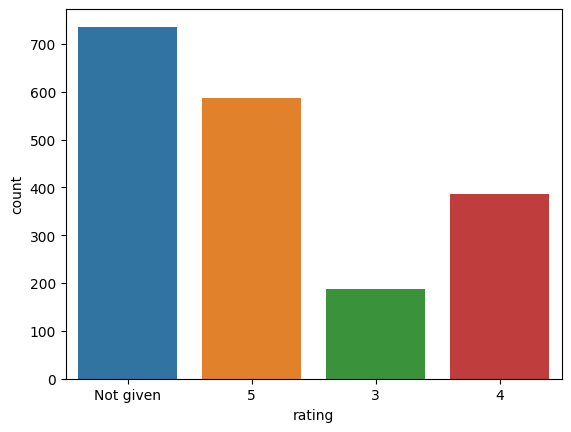

In [ ]:
sns.countplot(data = df, x = 'rating') ## Complete the code to plot bar graph for 'rating' column

#### Food Preparation time

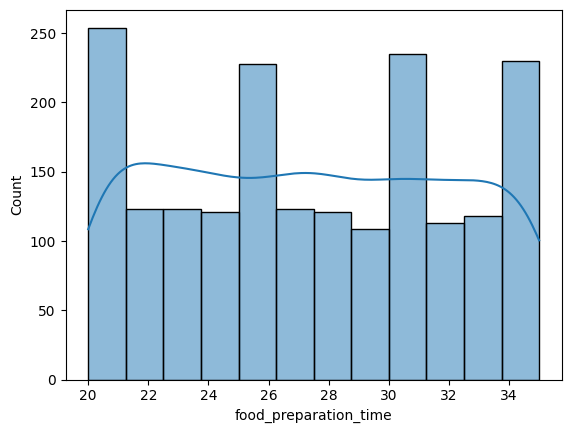

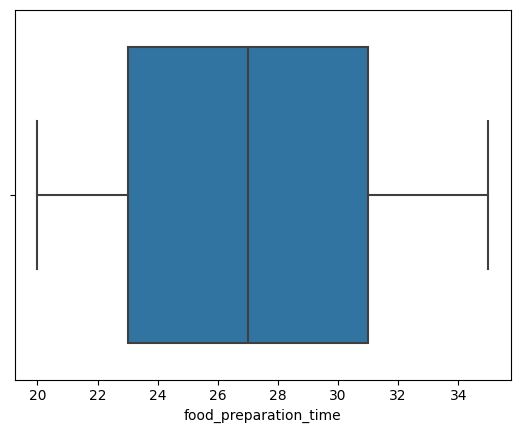

In [8]:
sns.histplot(data=df,x='food_preparation_time', kde ='TRUE')## code to plot the histogram for the food Preparation time
plt.show()

sns.boxplot(data=df,x='food_preparation_time') ## code to plot the boxplot for the food Preparation time
plt.show()

#### Delivery time

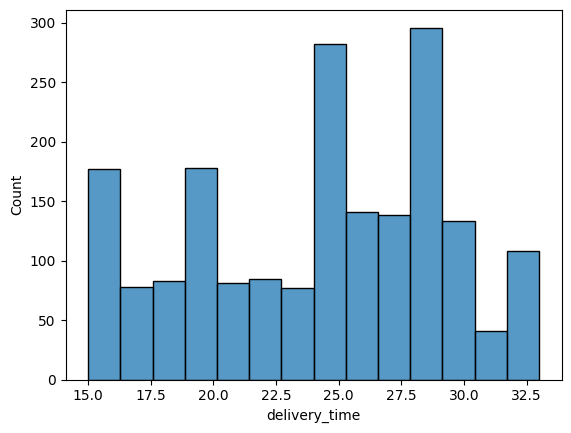

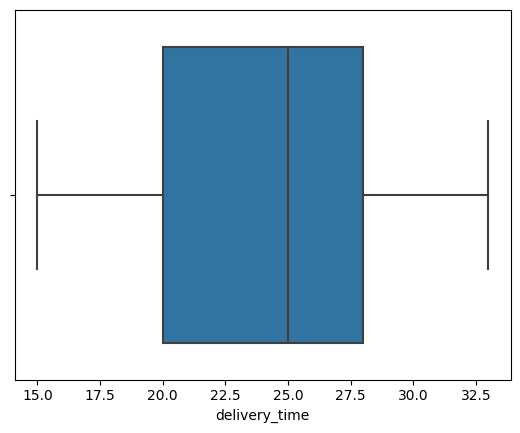

In [ ]:
sns.histplot(data=df,x='delivery_time') ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

Observatiob. - Top 5 restaurants with highest number of orders are
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm




### **Question 8:** Which is the most popular cuisine on weekends?

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend'] ## code to Create new dataframe with Weekend order entries only.
df_weekend['cuisine_type'].value_counts().head(1) ## code to check most popular cuisine type on weekend

American    415
Name: cuisine_type, dtype: int64

<Axes: xlabel='count', ylabel='cuisine_type'>

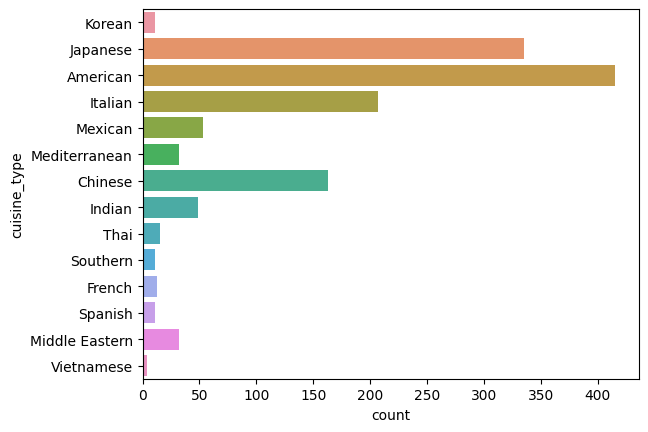

In [ ]:
sns.countplot(data=df_weekend,y='cuisine_type')## code to create countplot for cuisine type on weekend

Observation - American cuisine is the most popular cuisine on weekend.

### **Question 9:** What percentage of the orders cost more than 20 dollars?

In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Code to write appropriate column name to get the orders having cost above $20

# code to Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


Observation - 555 orders (29.24%) of the total orders cost more than $20.

### **Question 10:** What is the mean order delivery time?

In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean() ## code to write appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')## Mean delivery time rounded to 2 decimal places.

The mean delivery time for this dataset is 24.16 minutes


Observation - The mean delivery time for this dataset is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(3)  ## Code to get the top 5 cmost frequent customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

Observation - Customers with customer_id 52832, 47440, 83287 are the most frequent customers.

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

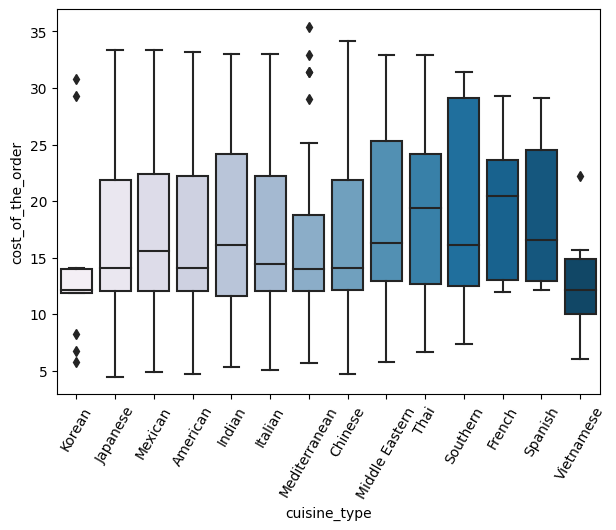


Median cost of cuisines are;
 cuisine_type
French            20.47
Thai              19.35
Spanish           16.52
Middle Eastern    16.30
Indian            16.15
Name: cost_of_the_order, dtype: float64

Mean cost of cuisines are;
 cuisine_type
French            19.793889
Southern          19.300588
Thai              19.207895
Spanish           18.994167
Middle Eastern    18.820612
Name: cost_of_the_order, dtype: float64


In [16]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(7,5))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')# Code to create the boxplot of cuisine type vs cost of the order.
plt.xticks(rotation = 60)
plt.show()

df_median_price = df.groupby(['cuisine_type'])['cost_of_the_order'].median().sort_values(ascending = False)# Code to calculate the Median price of all the cuisine types.
print(f"\nMedian cost of cuisines are;\n", df_median_price.head())

df_mean_price = df.groupby(['cuisine_type'])['cost_of_the_order'].mean().sort_values(ascending = False)# Code to calculate the Mean price of all the cuisine types.
print(f"\nMean cost of cuisines are;\n" , df_mean_price.head())


Observation - French Cuisine has the highest mean and median price.

#### Cuisine vs Food Preparation time

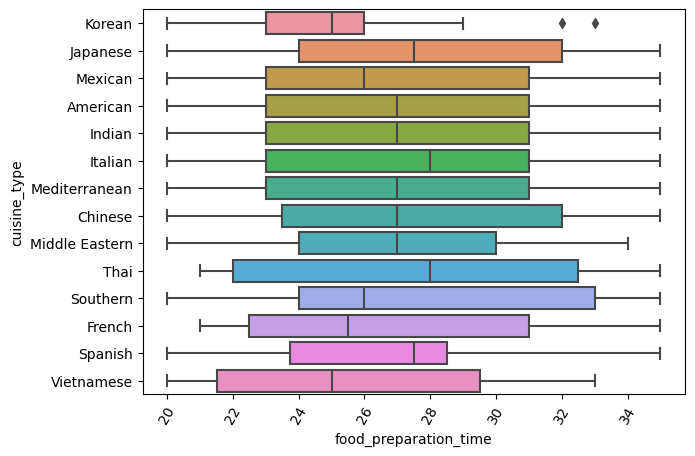

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(7,5))
sns.boxplot(y='cuisine_type' , x = 'food_preparation_time' , data = df)  ##code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

Observation - Cuisine Thai and Italian has the highest median food preparation time.

#### Day of the Week vs Delivery time

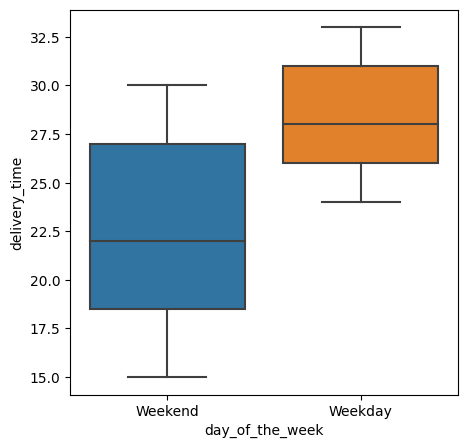

In [20]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(5,5))
sns.boxplot(x= 'day_of_the_week' , y = 'delivery_time' , data = df)  ## code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

Observation- Median Delievry time on Weekday is higher compared to weeknd.



#### Determine the revenue generated by the restaurants.

In [17]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head() ## Code to determine the revenue generated by each restaurant.

restaurant_name
Shake Shack                  3579.53
The Meatball Shop            2145.21
Blue Ribbon Sushi            1903.95
Blue Ribbon Fried Chicken    1662.29
Parm                         1112.76
Name: cost_of_the_order, dtype: float64

Observation - Restuarnt Shake Shack is the highest revenue generating restaurant.

#### Rating vs Delivery time

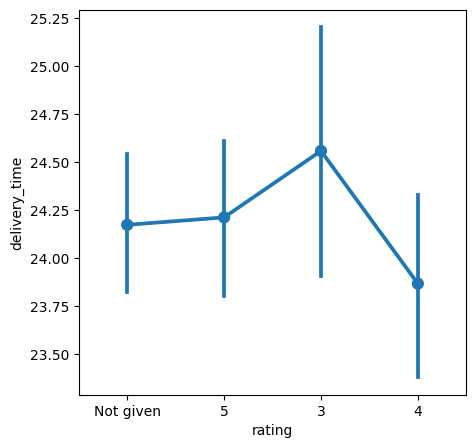

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(5, 5))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)##code to visualize the relationship between rating and delivery time using pointplot
plt.show()

#### Rating vs Food preparation time

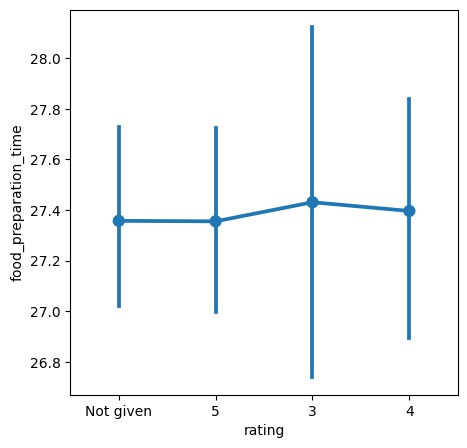

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(5, 5))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
##code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Rating vs Cost of the order

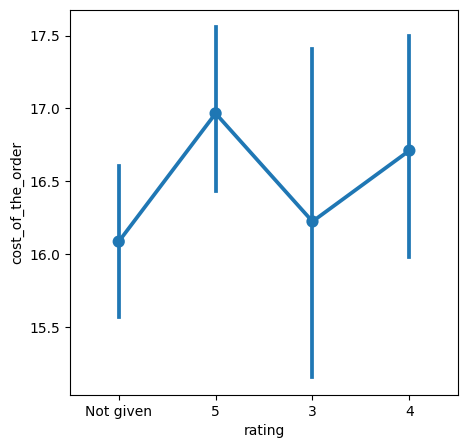

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(5,5))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   ## code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Correlation among variables

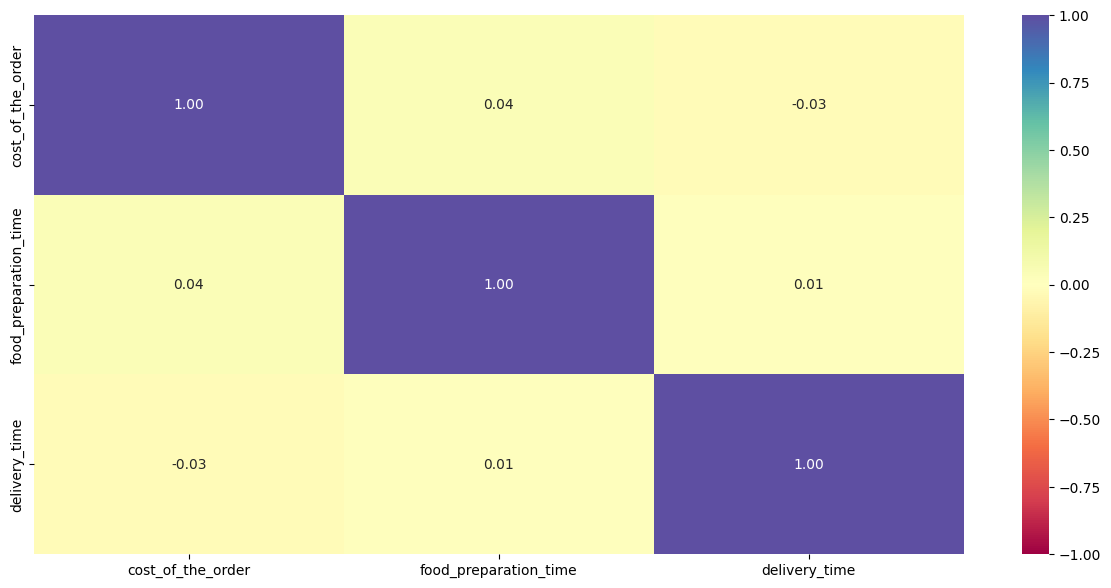

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time',]
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [22]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy().reset_index()
df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False)

#Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head(5)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [27]:
# Get the restaurant names that have rating count more than 50
rest_names1 = df_rating_count[df_rating_count['rating'] > 50].copy()
print(f"\nRestaurants with rating count above 50 are :\n\n" , rest_names1 , "\n")
rest_names = rest_names1['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy().reset_index()


# Group the restaurant names with their ratings and find the mean rating of each restaurant
print(f"\nRestaurants with Mean rating above 4 are \n")
print((df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna())) ## code to find the mean rating



Restaurants with rating count above 50 are :

              restaurant_name  rating
0                Shake Shack     133
1          The Meatball Shop      84
2          Blue Ribbon Sushi      73
3  Blue Ribbon Fried Chicken      64 


Restaurants with Mean rating above 4 are 

             restaurant_name    rating
0          The Meatball Shop  4.511905
1  Blue Ribbon Fried Chicken  4.328125
2                Shake Shack  4.278195
3          Blue Ribbon Sushi  4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Code to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


Ans - The net revenue is around 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

df_greater_than_60 = df[df['total_time']>60] ## Write the appropriate column name to get the orders having delivery time over 60 mins

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that take delievery time over 60 mins:', df_greater_than_60.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders taking above 60 mins:", round(percentage, 2), '%')



The number of total orders that take delievery time over 60 mins: 200
Percentage of orders taking above 60 mins: 10.54 %


Ans - 200 Orders take more than 60 mins to get delivered which is 10.54% of the overall orders.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## code below to get the mean delivery time on weekends and print it

print('\nThe mean delivery time on weekend is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')




The mean delivery time on weekdays is around 28 minutes

The mean delivery time on weekend is around 22 minutes


Ans - Weekend mean delivery time is 28 minutes, ans weekday mean delivery time 22 minutes, slightly lower than weekned mean delivery time.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
1. American, Japanese and Italian cuisine is the most popular and ordered cuisine amongst customer, and restaurant which offer this cuisine generate better revenue.

2. Customers place more orders on weekends, could be due work off day. During the weekdays they are eating in office cafeterias.

3. Shake shack, The meatball shop, blue ribbon fried chicken and blue ribbon sushi are the most liked and highly rated restaurants.

4. Average price of orders from these restaurants fall between 15.99 and 17.3 which is close to the overall average of the cost.

5. Cost of the order shows a positive correlation with Rating. In order to generate better revenue Restaurants should aim to better the ratings given to them.

6. Food preparation time shows no correlation with the rating.

7. Delivery cost of the order time shows a positive correlation with the rating but is not the driving force behind it.

8. Delivery on weekends are faster may be because more delivery person working on weekend as part time job ex, students.

### Recommendations:

1. Food Hub company should invite onboard more Vendors/Restaurants which offer American cuisine, Italian and Japanese cuisine.

2. Food hub should promote restaurants which offer more than 1 cuisine.

3. Food hub App should have a bell notification for orders that are left unrated.

4. Food Hub should also provide customers with better digital tools to reduce the hassle of giving ratings to the order.

5. To improve the rating Restaurants can offer complimentary food, extra ketchup packets, better cutleries, tissues etc.

6. Company should come up with Slash deals and limited time offer on weekdays to lure customers.

7. Company should employ more delivery people to reduce the delivery time on weekdays.

8. Company should do more advertisement of less ordered cuisine and can offer Promo codes on them.

9. Better digital campaigns.

10. more data can be gathered to understand the impact of other variables on the cost and ratings of the orders for example time of the day when order is placed, location of restaurant etc. .

---